In [1]:
# IMPORT THE PACKAGE NEEDED TO PROCESS A GENERATED MOCK CATALOG
import paramock.catalog as catalog
import paramock.galaxy as galaxy
import numpy as np

import pickle

In [2]:
# THE DATA IS STORED IN A PICKLE FILE AND IT IS A CONTAINER OF CATALOG OBJECT
data = pickle.load(open("example_mock.pkl", "rb"))

In [3]:
# THE INFORMATION ABOUT THE CONFIGURATION IS ALSO STORED IN THE PICKLE FILE
# THE DISTANCE PARAMETERS IN THE CONFIGURATION ARE ALL IN ''Mpc''
configuration = data['config']
mock_cat      = data['catalog']
for key in configuration:
    print("{}: {}".format(key, configuration[key]))

H_0: 70.0
omega_m0: 0.31
r_BAO: 153.0
sig_r_BAO: 5.0
gamma: 1.8
r_scale: 5.0
n_rand: 5000000
n_center: 4000
n_rim: 20
n_flat: 2500
nr_cl: 1000
n_cl: 40
n_cl_center: 40
frac_f2c: None
frac_c2r: None


In [4]:
# HERE IS AN EXAMPLE TO GET THE SEED GALAXY FOR A SELECTED GALAXY
# IN THE EXAMPLE, WE ARE CHECKING A CLUMP GALAXY WHICH HAS A CENTER GALAXY AS SEED
# EACH INCREMENTAL INTEGER IN THE NAME OF THE GALAXY IDX TELLS THE SEED FOR THAT GALAXY
print("Information about the selected galaxy:")
mock_cat.info("cenClump_447_-1_21")
# A CENTRAL CLUMP THAT IS GENERATED USING THE RIM GALAXY WITH IDX 'rim_147_8`
# THE LAST INTEGER IN THE NAME TELLS THAT IS THE 21TH CLUMP FOR THAT SEED
# A RIM GALAXY IS SEEDED BY A CENTER GALAXY. SO THE SEED GALAXY FOR THIS PARTICULAR RIM GALAXY
# IS `cen_147`
print("Information about the seed galaxy:")
mock_cat.info("rim_147_8")
print("Information about the seed galaxy of the seed galaxy:")
mock_cat.info("cen_147")

Information about the selected galaxy:
Galaxy (clump_center)
  Name:   cenClump_447_-1_21
  RA:     -215.40558864684147
  Dec:    17.30053939926114
  Dist:   2075.766509977996
  Prnt:   cen_447
Information about the seed galaxy:
Galaxy (rim)
  Name:   rim_147_8
  RA:     -226.40210654038657
  Dec:    11.167115506720037
  Dist:   2261.628567716643
  Prnt:   cen_147
Information about the seed galaxy of the seed galaxy:
Galaxy (center)
  Name:   cen_147
  RA:     -223.39473282725083
  Dec:    13.373253136321807
  Dist:   2278.3598555401845


/home/tyapici/anaconda/anaconda3/envs/paramockEnv/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ["'serif'"] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


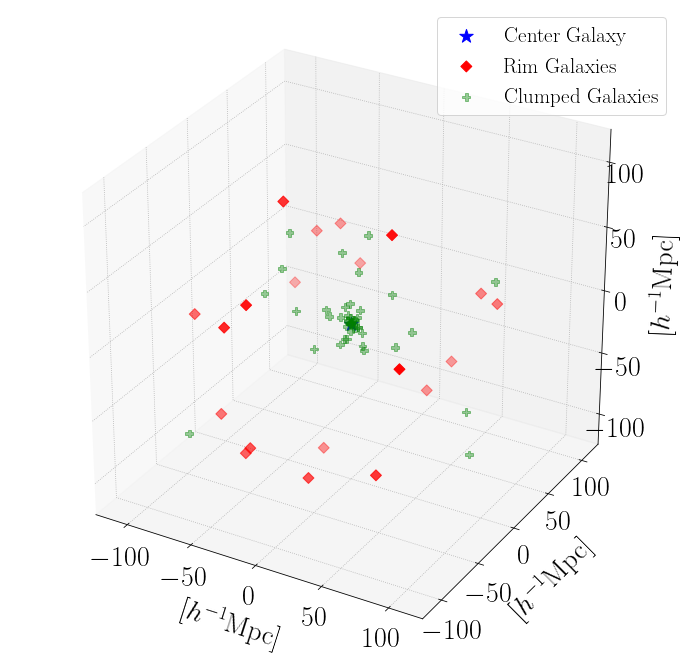

In [8]:
#
# THIS PART IS COPIED FROM THE CATALOG CLASS FOR GRAPHICAL DEMONSTRATION
#
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
plt.style.use("good_config")

idx = "cen_447"
x_cen, y_cen, z_cen, c_cen, m_cen = mock_cat.get_points(idx, get_childs=False)
fig = plt.figure(figsize=(12,12))
ax  = fig.add_subplot(111, projection='3d')
x, y, z, c, m = mock_cat.get_points(idx, get_childs=True)
rim_idx    = np.where(np.asarray(m)=='D')[0]
clump_idx  = np.where(np.asarray(m)=='P')[0]
ax.scatter(xs=0, ys=0, zs=0, c='blue', s=200, marker='*', label="Center Galaxy")
ax.scatter(xs=(np.asarray(x).flatten()[rim_idx]-x_cen[0])*.7, 
           ys=(np.asarray(y).flatten()[rim_idx]-y_cen[0])*.7, 
           zs=(np.asarray(z).flatten()[rim_idx]-z_cen[0])*.7, 
           c=np.asarray(c)[rim_idx], s=60, marker="D", label="Rim Galaxies")
ax.scatter(xs=(np.asarray(x).flatten()[clump_idx]-x_cen[0])*.7, 
           ys=(np.asarray(y).flatten()[clump_idx]-y_cen[0])*.7, 
           zs=(np.asarray(z).flatten()[clump_idx]-z_cen[0])*.7, 
           c=np.asarray(c)[clump_idx], s=60, marker="P", alpha=.4, label="Clumped Galaxies")
ax.set_xlim(-120., 120.)
ax.set_ylim(-120., 120.)
ax.set_zlim(-120., 120.)
ax.set_xlabel("[$h^{-1}$Mpc]", labelpad=20)
ax.set_ylabel("[$h^{-1}$Mpc]", labelpad=20)
ax.set_zlabel("[$h^{-1}$Mpc]", labelpad=20)
ax.legend()
plt.savefig("galaxies.pdf")
plt.show()